# Runtime Analysis 🏃‍♂️💨

In [1]:
import numpy as np
import time
import pandas as pd
from dtw_algorithm import get_accum_cost_and_steps, get_path
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns

## Conduct runtime experiments

In [2]:
def get_settings(algorithm):

    steps = np.array([1,1,1,2,2,1]).reshape((-1,2))
    weights = np.array([2,3,3])
    warp_max, subsequence = None, False

    if 'DTW2' in algorithm:
        steps = np.array([1,1,1,2,2,1]).reshape((-1,2))
        weights = np.array([1,2,2])
    elif algorithm == 'DTW3':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights = np.array([1,1,2])
    elif algorithm == 'DTW4':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights = np.array([1,1,1])
    elif algorithm == 'DTW5':
        steps = np.array([0,1,1,0]).reshape((-1,2))
        weights = np.array([1,1])
    elif algorithm == 'DTW1_add3':
        steps = np.array([1,1,1,2,2,1,1,3,3,1]).reshape((-1,2))
        weights = np.array([2,3,3,4,4])
    elif algorithm == 'DTW1_add4':
        steps = np.array([1,1,1,2,2,1,1,3,3,1,1,4,4,1]).reshape((-1,2))
        weights = np.array([2,3,3,4,4,5,5])

    elif algorithm == 'adaptiveWeight1':
        steps = np.array([0,1,1,0]).reshape((-1,2))
    elif algorithm == 'adaptiveWeight2':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))

    elif algorithm == 'selectiveTransitions2':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights, warp_max = np.array([1,1,2]), 2
    elif algorithm == 'selectiveTransitions3':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights, warp_max = np.array([1,1,2]), 3
    elif algorithm == 'selectiveTransitions4':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights, warp_max = np.array([1,1,2]), 4
    elif algorithm == 'selectiveTransitions5':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights, warp_max = np.array([1,1,2]), 5

    elif algorithm == 'SubDTW1':
        steps = np.array([1,1,1,2,2,1]).reshape((-1,2))
        weights, subsequence = np.array([1,1,2]), True
    elif algorithm == 'SubDTW2':
        steps = np.array([1,1,1,2,2,1]).reshape((-1,2))
        weights, subsequence = np.array([2,3,3]), True
    elif algorithm == 'SubDTW3':
        steps = np.array([1,1,1,2,2,1]).reshape((-1,2))
        weights, subsequence = np.array([1,2,2]), True
    elif algorithm == 'SubDTW4':
        steps = np.array([1,1,1,2,2,1]).reshape((-1,2))
        weights, subsequence = np.array([1,1,1]), True
    elif algorithm == 'SubDTW5':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights, subsequence = np.array([0,1,1]), True
    elif algorithm == 'SubDTW6':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights, subsequence = np.array([1,1,1]), True
    elif algorithm == 'SubDTW7':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights, subsequence = np.array([1,1,2]), True

    elif algorithm == 'SubDTW3_add3':
        steps = np.array([1,1,1,2,2,1,1,3,3,1]).reshape((-1,2))
        weights, subsequence = np.array([1,2,2,1,3]), True
    elif algorithm == 'SubDTW6_add3':
        steps = np.array([0,1,1,0,1,1,1,3,3,1]).reshape((-1,2))
        weights, subsequence = np.array([1,1,1,1,3]), True
    elif algorithm == 'SubDTW3_add4':
        steps = np.array([1,1,1,2,2,1,1,3,3,1,1,4,4,1]).reshape((-1,2))
        weights, subsequence = np.array([1,2,2,1,3,1,4]), True
    elif algorithm == 'SubDTW6_add4':
        steps = np.array([0,1,1,0,1,1,1,3,3,1,1,4,4,1]).reshape((-1,2))
        weights, subsequence = np.array([1,1,1,1,3,1,4]), True

    elif algorithm == 'SubDTW_selectiveTransitions2':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights = np.array([1,1,2])
        warp_max, subsequence = 2, True
    elif algorithm == 'SubDTW_selectiveTransitions3':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights = np.array([1,1,2])
        warp_max, subsequence = 3, True
    elif algorithm == 'SubDTW_selectiveTransitions4':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights = np.array([1,1,2])
        warp_max, subsequence = 4, True
    elif algorithm == 'SubDTW_selectiveTransitions5':
        steps = np.array([0,1,1,0,1,1]).reshape((-1,2))
        weights = np.array([1,1,2])
        warp_max, subsequence = 5, True

    elif algorithm == 'DTW2_add3':
        steps = np.array([1,1,1,2,2,1,1,3,3,1]).reshape((-1,2))
        weights = np.array([1,2,2,4,4])
    elif algorithm == 'DTW2w2_add3':
        steps = np.array([1,1,1,2,2,1,1,3,3,1]).reshape((-1,2))
        weights = np.array([1,2,2,3,3])
    elif algorithm == 'DTW2_add4':
        steps = np.array([1,1,1,2,2,1,1,3,3,1,1,4,4,1]).reshape((-1,2))
        weights = np.array([1,2,2,4,4,5,5])
    elif algorithm == 'DTW2w2_add4':
        steps = np.array([1,1,1,2,2,1,1,3,3,1,1,4,4,1]).reshape((-1,2))
        weights = np.array([1,2,2,3,3,4,4])

    return steps, weights, warp_max, subsequence

In [3]:
def alignDTW(F1, F2, algorithm):

    res = []
    steps, weights, warp_max, subsequence = get_settings(algorithm)
    N, M = F1.shape[1], F2.shape[1] # we assume that N >= M
    res.append(time.time())
    
    # apply downsampling or adaptive weights
    if algorithm == "downsampleQuantized":
        # we wish to only select M columns of of F1 to get (12 x M)
        index = [int(round(x)) for x in np.linspace(0, N-1, M)]
        F1 = F1[:, index]
    elif algorithm == "downsampleInterpolate":
        # we want to multiply matrix (12 x N) by (N x M) to get (12 x M)
        transform = np.zeros((N, M))
        index = np.linspace(0, N-1, M) # M indices evenly spaced between [0, N-1]
        for col, index in enumerate(index):
            # at column m, insert weight RIGHT at position ROW and LEFT at position ROW+1
            row = int(index)
            right = index - int(index)
            left = 1 - right
            # if we are at the last row, insert weight 1
            if row + 1 == N:
                transform[row, col] = 1
                continue
            transform[row, col] = left
            transform[row+1, col] = right
        F1 = F1 @ transform
    elif algorithm == "upsampleQuantized":
        index = [int(x) for x in np.linspace(0, M-1, N)]
        F2 = F2[:, index] 
    elif algorithm == "upsampleInterpolate":
        # we want to multiply matrix (12 x M) by (M x N) to get (12 x N)
        transform = np.zeros((M, N))
        index = np.linspace(0, M-1, N) # N indices evenly spaced between [0, M-1]
        for col, index in enumerate(index):
            # at column N, insert weight RIGHT at position ROW and LEFT at position ROW+1
            row = int(index)
            right = index - int(index)
            left = 1 - right
            # if we are at the last row, insert weight 1
            if row + 1 == M:
                transform[row, col] = 1
                continue
            transform[row, col] = left
            transform[row+1, col] = right
        F2 = F2 @ transform
    elif algorithm == "adaptiveWeight1":
        weights = np.array([N/M, 1])
    elif algorithm == "adaptiveWeight2":
        weights = np.array([N/M, 1, 1 + N/M])
    res.append(time.time())

    # compute cost matrix
    C = 1 - F1.T @ F2
    res.append(time.time())

    # run DTW algorithm
    x_steps = steps[:,0].astype(np.uint32) # horizontal steps
    y_steps = steps[:,1].astype(np.uint32) # veritcal steps
    params = {'x_steps': x_steps, 'y_steps': y_steps, 'weights': weights, 'subsequence': subsequence}
    D, s = get_accum_cost_and_steps(C, params, warp_max)
    res.append(time.time())

    # retrieve paths and steps taken
    path, _, _, track_steps = get_path(D, s, params)
    res.append(time.time())

    if algorithm == "downsampleQuantized" or algorithm == "downsampleInterpolate":
        path[0] = path[0] * N / M
    elif algorithm == "upsampleQuantized" or algorithm == "upsampleInterpolate":
        path[1] = path[1] * M / N
    res.append(time.time())
    
    return np.diff(res)

In [ ]:
algos = ['DTW1', 'DTW2', 'DTW3', 'DTW4', 'DTW5', 'DTW1_add3', 'DTW1_add4', 'DTW2_downsampleQuantized', 'DTW2_downsampleInterpolate', 'DTW2_upsampleQuantized', 'DTW2_upsampleInterpolate', 'adaptiveWeight1', 'adaptiveWeight2', 'selectiveTransitions2','selectiveTransitions3','selectiveTransitions4','selectiveTransitions5']
Ns = [100, 300, 1_000, 3_000, 10_000, 30_000]
Ks = [1, 2, 4]

with open('run_time.csv', 'w') as f:
    for algo in algos:
        for N in Ns:
            for K in Ks:
                for _ in range(10):
                    F1 = np.random.rand(12,N)
                    F2 = np.random.rand(12,N*K)
                    times = alignDTW(F1, F2, algo)
                    times = ",".join(map(str, times))
                    f.write(f'{algo},{N},{N*K},{times}\n')

## Analyze average run time (log scale)

In [2]:
df =  pd.read_csv('results/run_time.csv')
for i in range(3,df.shape[1]):
    df.iloc[:,i] = df.iloc[:,i].apply(lambda x: float(x))
df = df.groupby(["algorithm", "N", "M"]).mean().reset_index()
df['time'] = df["adjust_sample_adaptive"] + df["compute_cost_matrix"] + df["get_accum_cost_and_steps"] + df["retrieve_path"] + df["adjust_sample"]
df['size'] = df['N'].astype(str) + "x" + df['M'].astype(str)
df.drop(["N", "M", "adjust_sample_adaptive", "compute_cost_matrix", "get_accum_cost_and_steps", "retrieve_path", "adjust_sample"], axis=1, inplace=True)
algo_order = CategoricalDtype(
    ['DTW1', 'DTW2', 'DTW3', 'DTW4', 'DTW5', 'DTW1_add3', 'DTW1_add4', 'DTW2_downsampleQuantized', 'DTW2_downsampleInterpolate', 'DTW2_upsampleQuantized', 'DTW2_upsampleInterpolate', 'adaptiveWeight1', 'adaptiveWeight2', 'selectiveTransitions2','selectiveTransitions3','selectiveTransitions4','selectiveTransitions5'], 
    ordered=True
)
df['algorithm'] = df['algorithm'].astype(algo_order)
df.sort_values('algorithm')

df["algorithm"] = df["algorithm"].apply(lambda x: x.replace("Quantized", "NN") if "Quantized" in x else x)
df["algorithm"] = df["algorithm"].apply(lambda x: x.replace("Interpolate", "Lin") if "Interpolate" in x else x)
df["algorithm"] = df["algorithm"].apply(lambda x: "SelectiveTransitions_max" + x[-1] if "selective" in x else x)
df["algorithm"] = df["algorithm"].apply(lambda x: "AdaptiveWeight" + x[-1] if "adaptive" in x else x)
df.head()

,algorithm,time,size
0,DTW1,0.000304,100x100
1,DTW1,0.000609,100x200
2,DTW1,0.001210,100x400
3,DTW1,0.002661,300x300
4,DTW1,0.005188,300x600


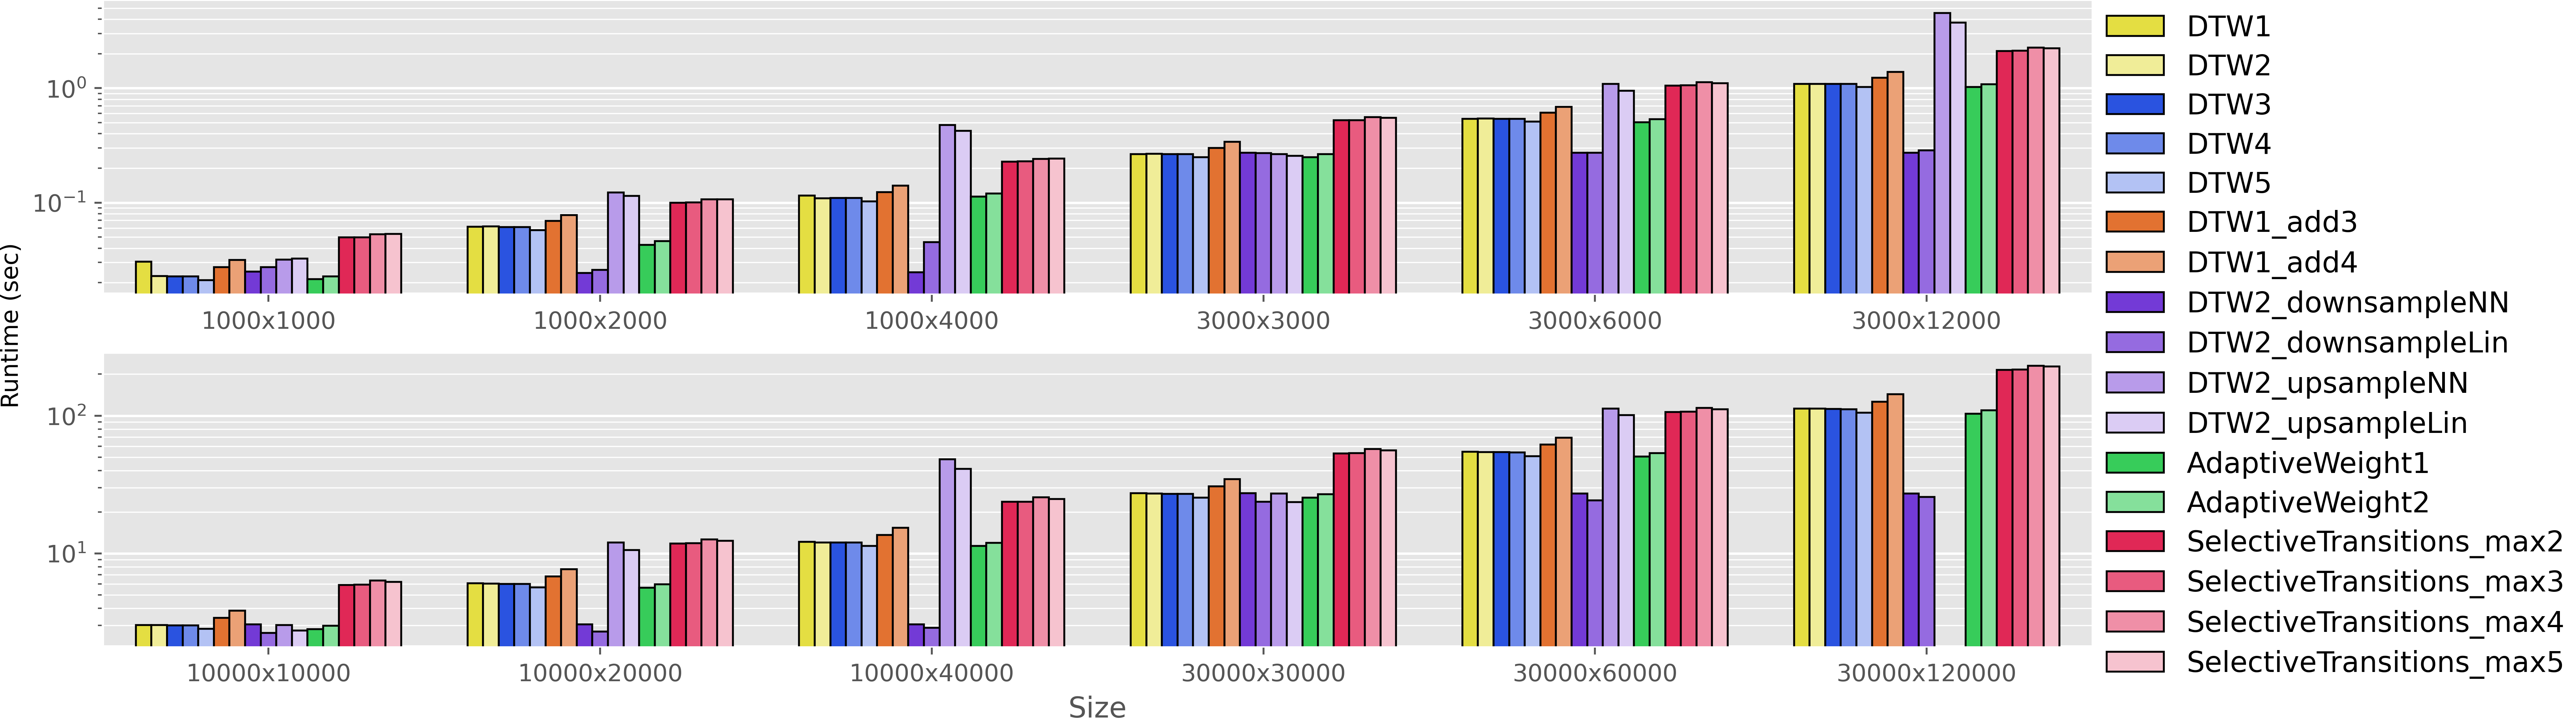

In [4]:
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['savefig.pad_inches'] = 0
plt.style.use("ggplot")

color_dict = {
    'DTW1': '#FFF727',
    'DTW2': '#FFFB89',
    'DTW3': '#0B42FF',
    'DTW4': '#597FFF',
    'DTW5': '#A8BCFF',
    'DTW1_add3': '#FF6A14',
    'DTW1_add4': '#FF9C62',
    'DTW2_downsampleNN': '#6C20F0',
    'DTW2_downsampleLin': '#9057F4',
    'DTW2_upsampleNN': '#B58EF7',
    'DTW2_upsampleLin': '#D9C5FB',
    'AdaptiveWeight1': '#1EE54D',
    'AdaptiveWeight2': '#76EF93',
    'SelectiveTransitions_max2': '#FF0947',
    'SelectiveTransitions_max3': '#FF4473',
    'SelectiveTransitions_max4': '#FF7F9F',
    'SelectiveTransitions_max5': '#FFBACB',
    'DTW2_adaptiveHop': '#1EE54D',
    'DTW2_adaptiveHopDownsample': '#76EF93',
}

df1 = df.loc[df['size'].isin([f"{keeper}x{keeper*x}" for keeper in [1_000, 3_000] for x in [1,2,4]])]
df2 = df.loc[df['size'].isin([f"{keeper}x{keeper*x}" for keeper in [10_000, 30_000] for x in [1,2,4]])]

colors = df['algorithm'].map(color_dict)

fig, axes = plt.subplots(2, 1, figsize=(15, 5))

g1 = sns.barplot(ax=axes[0], data=df1, x="size", y="time", hue="algorithm", palette=color_dict, ec='black', zorder=3, linewidth=0.8)
g1.set_yscale("log")
g1.grid(True, which="minor", axis='y', ls="-", linewidth=0.5)
locmin = mpl.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)
g1.axes.yaxis.set_minor_locator(locmin)
g1.axes.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
g1.grid(True, which="major", axis='y', ls="-", linewidth=1.0)  


g2 = sns.barplot(ax=axes[1], data=df2, x="size", y="time", hue="algorithm", palette=color_dict, ec='black', zorder=3, linewidth=0.8)
g2.set_yscale("log")
g2.grid(True, which="minor", axis='y', ls="-", linewidth=0.5)
locmin = mpl.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)
g2.axes.yaxis.set_minor_locator(locmin)
g2.axes.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
g2.grid(True, which="major", axis='y', ls="-", linewidth=1.0)  

axes[0].set_ylabel("", size=12)
axes[1].set_ylabel("", size=12)
fig.text(0.085, 0.5, 'Runtime (sec)', va='center', rotation='vertical')
axes[1].set_xlabel("Size", size=12)
axes[0].set_xlabel("", size=12)

axes[0].legend(bbox_to_anchor=(1, 1), fontsize=12, loc=0, labelspacing=0.4, borderaxespad=0.1, framealpha=0, facecolor='white')
axes[1].get_legend().remove()
plt.show()

In [57]:
# plot_grouped_barplot(df, [100, 300])

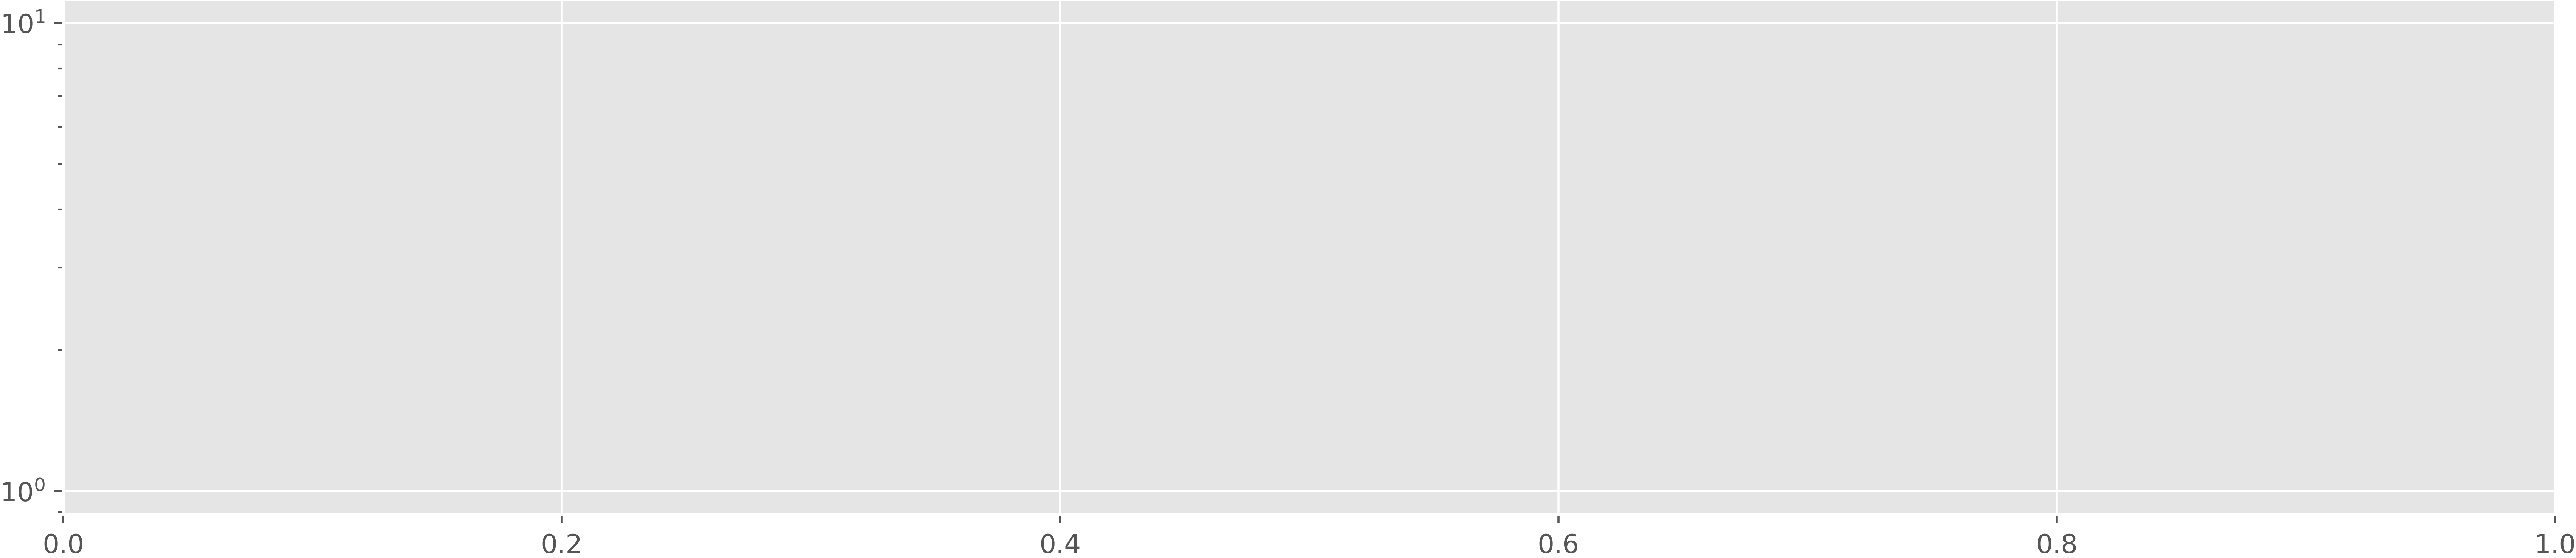

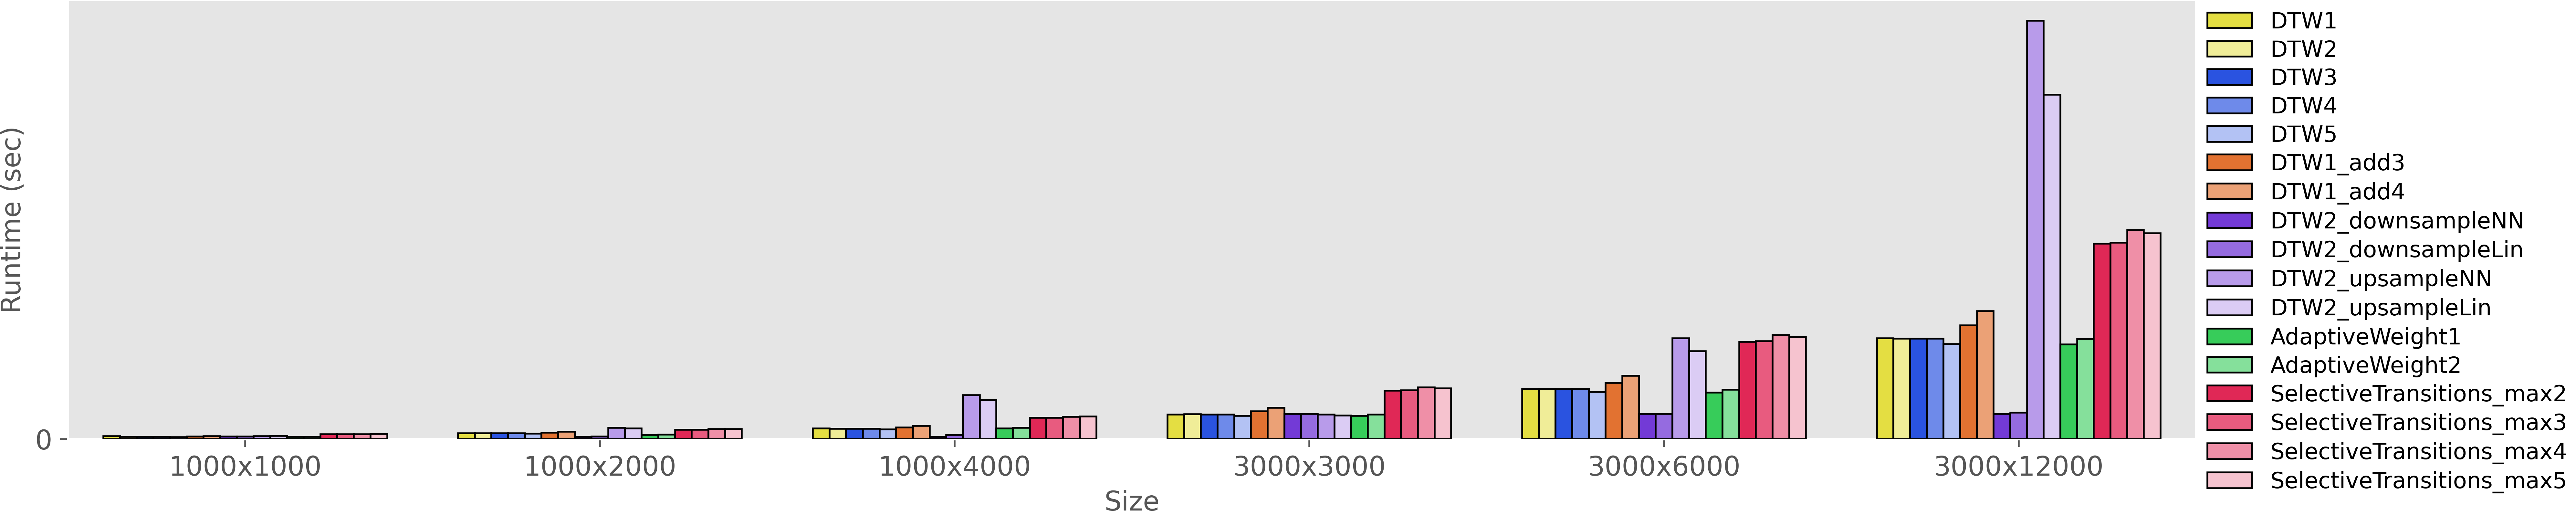

In [33]:
plt.yscale('log')
plot_grouped_barplot(df, [1_000, 3_000])

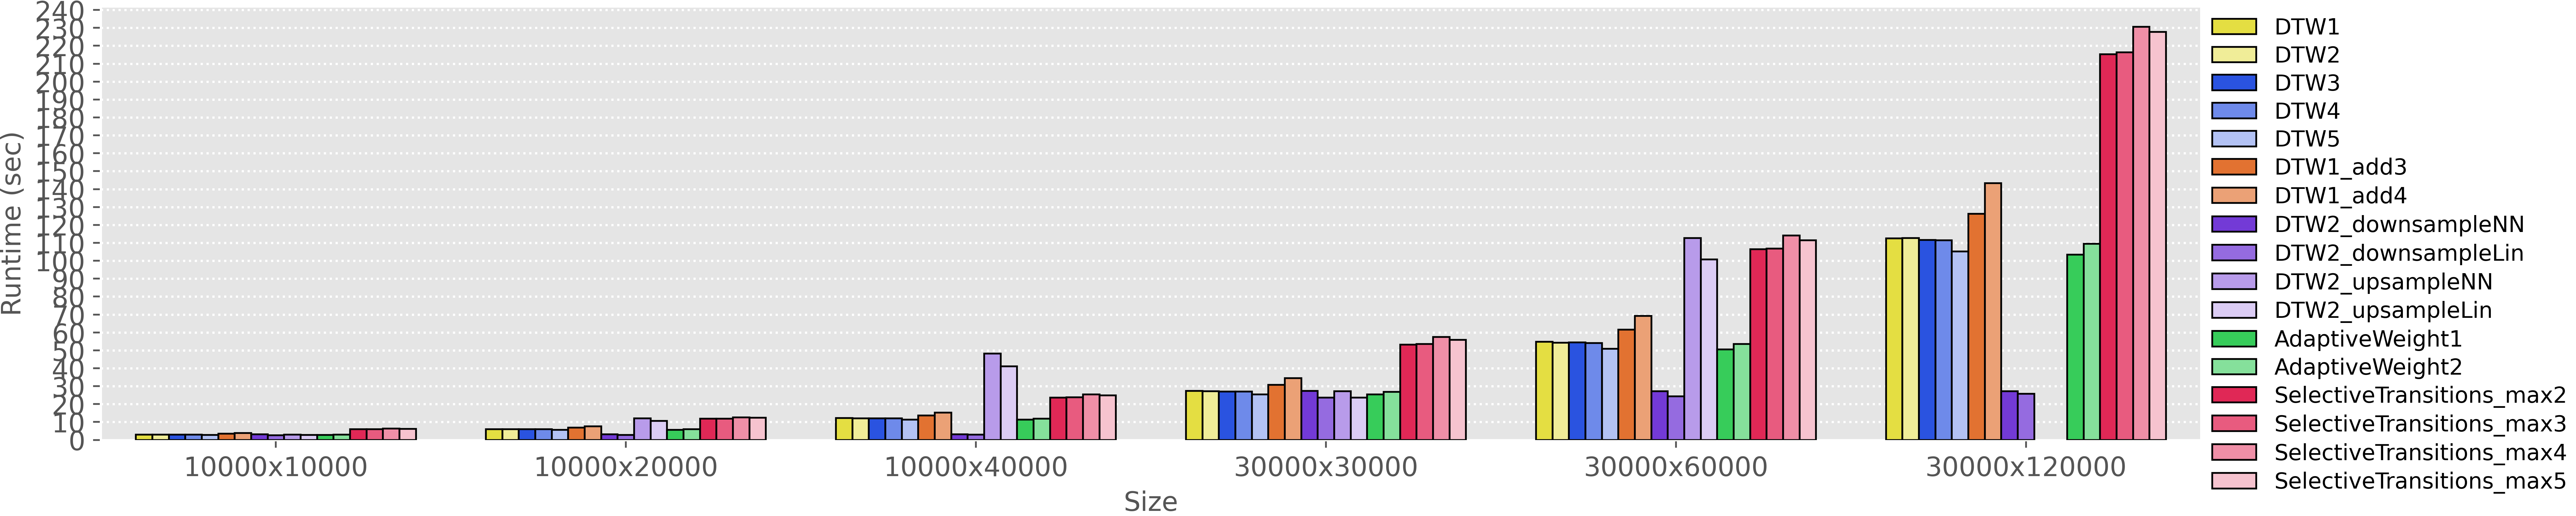

In [30]:
plot_grouped_barplot(df, [10_000, 30_000])

## Analyze standard deviation runtime

In [149]:
df =  pd.read_csv('results/run_time.csv')
for i in range(3,df.shape[1]):
    df.iloc[:,i] = df.iloc[:,i].apply(lambda x: float(x))
df['time'] = df["adjust_sample_adaptive"] + df["compute_cost_matrix"] + df["get_accum_cost_and_steps"] + df["retrieve_path"] + df["adjust_sample"]
df = df.groupby(["algorithm", "N", "M"]).std().reset_index()
# df['time'] = np.log(df['time'])
# constant = abs(min(df["time"]) - 1)
# df['time'] = df['time'] + constant
df['size'] = df['N'].astype(str) + "x" + df['M'].astype(str)
df.drop(["N", "M", "adjust_sample_adaptive", "compute_cost_matrix", "get_accum_cost_and_steps", "retrieve_path", "adjust_sample"], axis=1, inplace=True)
algo_order = CategoricalDtype(
    ['DTW1', 'DTW2', 'DTW3', 'DTW4', 'DTW5', 'DTW1_add3', 'DTW1_add4', 'DTW2_downsampleQuantized', 'DTW2_downsampleInterpolate', 'DTW2_upsampleQuantized', 'DTW2_upsampleInterpolate', 'adaptiveWeight1', 'adaptiveWeight2', 'selectiveTransitions2','selectiveTransitions3','selectiveTransitions4','selectiveTransitions5'], 
    ordered=True
)
df['algorithm'] = df['algorithm'].astype(algo_order)
df.sort_values('algorithm')
df.head()

,algorithm,time,size
0,DTW1,0.000084,100x100
1,DTW1,0.000041,100x200
2,DTW1,0.000130,100x400
3,DTW1,0.000125,300x300
4,DTW1,0.000239,300x600


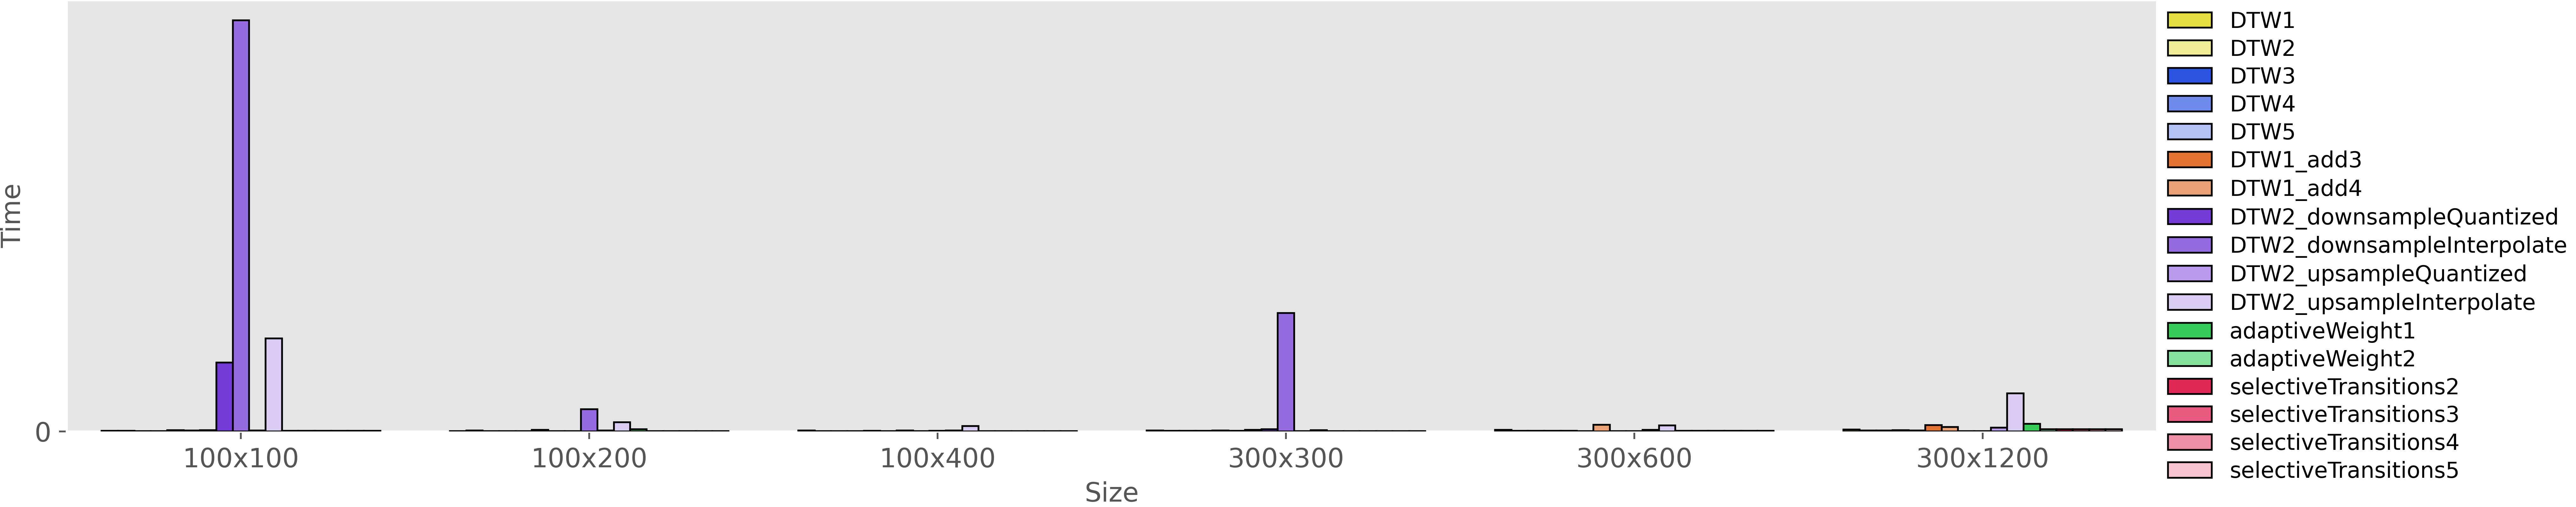

In [153]:
plot_grouped_barplot(df, [100, 300])

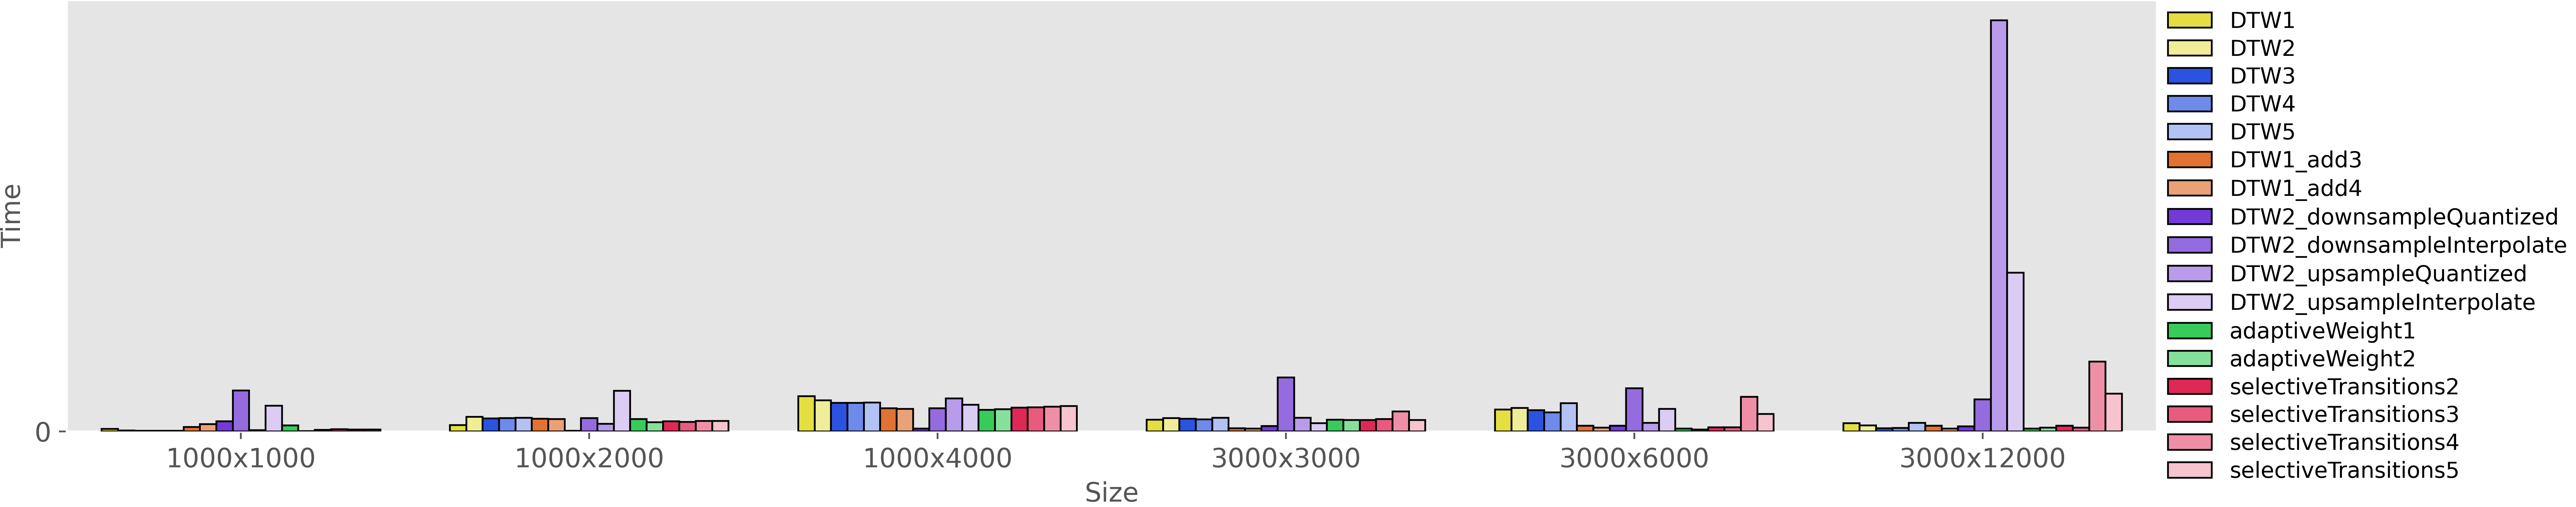

In [154]:
plot_grouped_barplot(df, [1_000, 3_000])

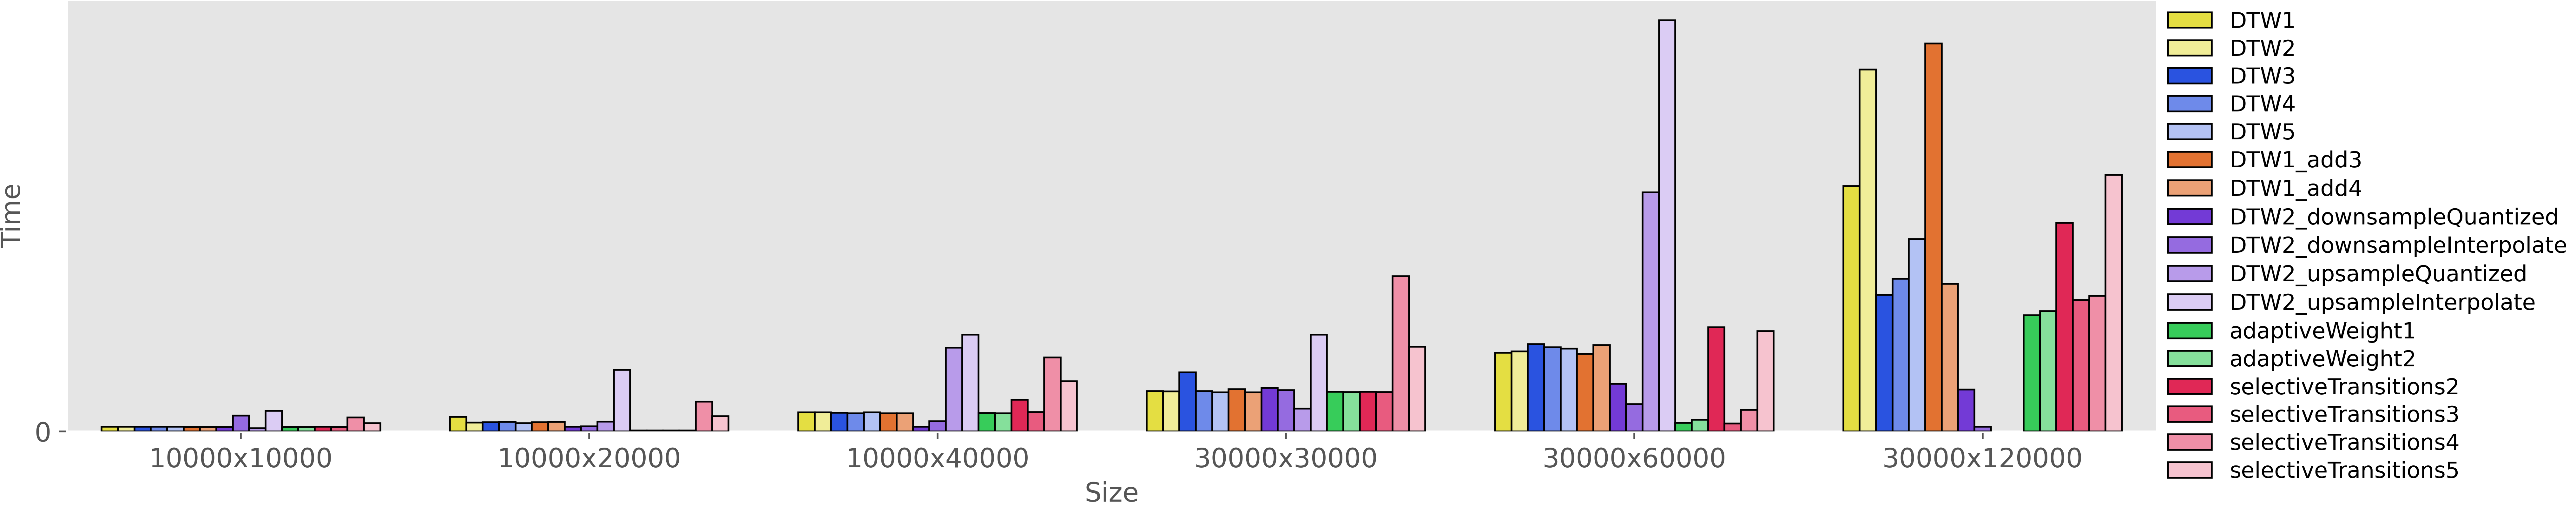

In [155]:
plot_grouped_barplot(df, [10_000, 30_000])